We can't add both pip installs to automata-lib and visual-automata at the same time so consequently I separated them

also I separated Cells for better understanding so hopefully this won't be an issue

In [ ]:
pip install automata-lib

In [ ]:
pip install visual-automata

In [ ]:
# You need to save to uploaded files to your drive for google colab to be able to mount the drive and see the files
## then drag and drop the files to the session storage

# or simply just add the 2 files to the session

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import json
from automata.fa.nfa import NFA
from visual_automata.fa.nfa import VisualNFA

#Self implemented Functions and Classes for NFA
from NFAClass import nNFA
import UtilityFun as ufNFA

#Self Implemented Functions and CLasses for DFA
from MinDFAClass import mDFA
import UtilityFunDFA as ufDFA

## Take the Input

In [ ]:
Regex = input("Enter a regular expression: ")

## Take Regex prep it(Get Postfix) and Create NFA

In [ ]:
Replacement,Regex=ufNFA.preptoCharacterSet(Regex)
Postfix=ufNFA.postfix(ufNFA.preptoConcat(Regex))
print(Postfix)
print(ufNFA.preptoConcat(Regex))
NFAstack=[]

for i in Postfix:
    if(i.isalpha()| i.isdigit()):
        i=Replacement if(i=="X") else i
        Temp=nNFA()
        Temp.newNFA(i)
        NFAstack.append(Temp)
    if(i=='+'):
        Temp=NFAstack.pop()
        Temp.plus()
        NFAstack.append(Temp)
    if(i=='*'):
        Temp=NFAstack.pop()
        Temp.star()
        NFAstack.append(Temp)
    if(i=='.'):
        Temp1=NFAstack.pop()
        Temp2=NFAstack.pop()
        Temp2.concatinate(Temp1)
        NFAstack.append(Temp2)
    if(i=='|'):
        Temp1=NFAstack.pop()
        Temp2=NFAstack.pop()
        Temp2.OR(Temp1)
        NFAstack.append(Temp2)
Draw=NFAstack.pop()
Draw.printNFA()

AB.C|X.+
(((A.B)|C).(X))+
Test NFA:
Nstates: [2, 3, 4, 5, 6, 7, 1, 8, 9, 10, 0, 11]
Ninput_symbols: ['A', 'B', 'C', 'A-Z']
Ntransitions: {'s2': {'A': {'s3'}}, 's4': {'B': {'s5'}}, 's3': {'': {'s4'}}, 's6': {'C': {'s7'}}, 's1': {'': {'s2', 's6'}}, 's5': {'': {'s8'}}, 's7': {'': {'s8'}}, 's9': {'A-Z': {'s10'}}, 's8': {'': {'s9'}}, 's0': {'': {'s1'}}, 's10': {'': {'s0', 's11'}}}
Ninitial_state: 0
Nfinal_states: 11


## Take NFA and place it in the format to be Drawn

Test NFA:
Nstates: {'s2', 's8', 's10', 's0', 's9', 's6', 's4', 's5', 's1', 's7', 's11', 's3'}
Ninput_symbols: {'A-Z', 'A', 'B', 'C'}
Ntransitions: {'s2': {'A': {'s3'}}, 's4': {'B': {'s5'}}, 's3': {'': {'s4'}}, 's6': {'C': {'s7'}}, 's1': {'': {'s2', 's6'}}, 's5': {'': {'s8'}}, 's7': {'': {'s8'}}, 's9': {'A-Z': {'s10'}}, 's8': {'': {'s9'}}, 's0': {'': {'s1'}}, 's10': {'': {'s0', 's11'}}}
Ninitial_state: s0
Nfinal_states: {'s11'}


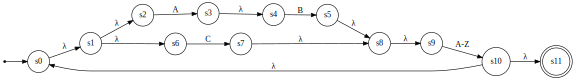

In [ ]:
draw1=Draw.prepToDraw()
draw1.printNFA()
nfa = NFA(
    states=draw1.Nstates,
    input_symbols=draw1.Ninput_symbols,
    transitions=draw1.Ntransitions,
    initial_state=draw1.Ninitial_state,
    final_states=draw1.Nfinal_states
)

nfa = VisualNFA(nfa)

nfa.show_diagram()

## Take the Drawn NFA and place it in the Format for JSON file

In [ ]:
# print(draw1.Ntransitions)
dictionary = ufNFA.prepToJSON(draw1.Ntransitions, draw1.Ninitial_state, draw1.Nfinal_states)
print(dictionary)
with open("nfa.json", "w") as outfile:
    json.dump(dictionary, outfile)


    

{'StartingState': 's0', 's2': {'isTerminatingState': False, 'A': ['s3']}, 's4': {'isTerminatingState': False, 'B': ['s5']}, 's3': {'isTerminatingState': False, 'Epsilon': ['s4']}, 's6': {'isTerminatingState': False, 'C': ['s7']}, 's1': {'isTerminatingState': False, 'Epsilon': ['s2', 's6']}, 's5': {'isTerminatingState': False, 'Epsilon': ['s8']}, 's7': {'isTerminatingState': False, 'Epsilon': ['s8']}, 's9': {'isTerminatingState': False, 'A-Z': ['s10']}, 's8': {'isTerminatingState': False, 'Epsilon': ['s9']}, 's0': {'isTerminatingState': False, 'Epsilon': ['s1']}, 's10': {'isTerminatingState': False, 'Epsilon': ['s0', 's11']}, 's11': {'isTerminatingState': True}}


## **Now For DFA**

# Read From JSON File and get stats 

In [ ]:
# JSON file
f = open ('nfa.json', "r")
 
# Reading from file
data = json.loads(f.read())
minDFA = mDFA()
transition,start,final,symbols = ufDFA.prepToTransitions(data)
states, symbols=minDFA.NFATmDFA(transition,start,final,symbols)
# print(states)
# print(symbols)
minDFA.getTransitionFstatesSymbols(states, symbols)
minDFA.moreMinimization()
minDFA.printDFA()

# To Draw The DFA
  I used this NFA from visualvis to draw the output as we want

In [ ]:
nfa = VisualNFA(
    states=minDFA.Nstates,
    input_symbols=minDFA.Ninput_symbols,
    transitions=minDFA.Ntransitions,
    initial_state=minDFA.Ninitial_state,
    final_states=minDFA.Nfinal_states
)
nfa.show_diagram()


# Do DFA JSON

In [ ]:
dictionary = ufDFA.prepToJSON(minDFA.Ntransitions, minDFA.Ninitial_state, minDFA.Nfinal_states)
print(dictionary)
with open("dfa.json", "w") as outfile:
    json.dump(dictionary, outfile)